Step 1: Import Libraries

In [257]:
import pandas as pd
import numpy as np
import re
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

Step 2: Load the Dataset

In [258]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/student_depression_dataset.csv")
column_mapping = {
    "id": "id",
    "Gender": "gender",
    "Age": "age",
    "City": "city",
    "Profession": "profession",
    "Academic Pressure": "academic_pressure",
    "Work Pressure": "work_pressure",
    "CGPA": "cgpa",
    "Study Satisfaction": "study_satisfaction",
    "Job Satisfaction": "job_satisfaction",
    "Sleep Duration": "sleep_duration",
    "Dietary Habits": "dietary_habits",
    "Degree": "degree",
    "Have you ever had suicidal thoughts ?": "suicidal_thoughts",
    "Work/Study Hours": "work_study_hours",
    "Financial Stress": "financial_stress",
    "Family History of Mental Illness": "family_mental_illness",
    "Depression": "depression"
}
df = df.rename(columns=column_mapping)
print("Number of example: {}".format(len(df)))

Path to dataset files: /Users/jakub/.cache/kagglehub/datasets/adilshamim8/student-depression-dataset/versions/1
Number of example: 27901


Step 3: Data Cleaning & Preprocessing

3.1 Convert and Clean Data Types

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27901 non-null  int64  
 1   gender                 27901 non-null  object 
 2   age                    27901 non-null  float64
 3   city                   27901 non-null  object 
 4   profession             27901 non-null  object 
 5   academic_pressure      27901 non-null  float64
 6   work_pressure          27901 non-null  float64
 7   cgpa                   27901 non-null  float64
 8   study_satisfaction     27901 non-null  float64
 9   job_satisfaction       27901 non-null  float64
 10  sleep_duration         27901 non-null  object 
 11  dietary_habits         27901 non-null  object 
 12  degree                 27901 non-null  object 
 13  suicidal_thoughts      27901 non-null  object 
 14  work_study_hours       27901 non-null  float64
 15  fi

In [260]:
df.describe(include='all')

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


In [261]:
df

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [262]:
df["sleep_duration"].value_counts()

sleep_duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

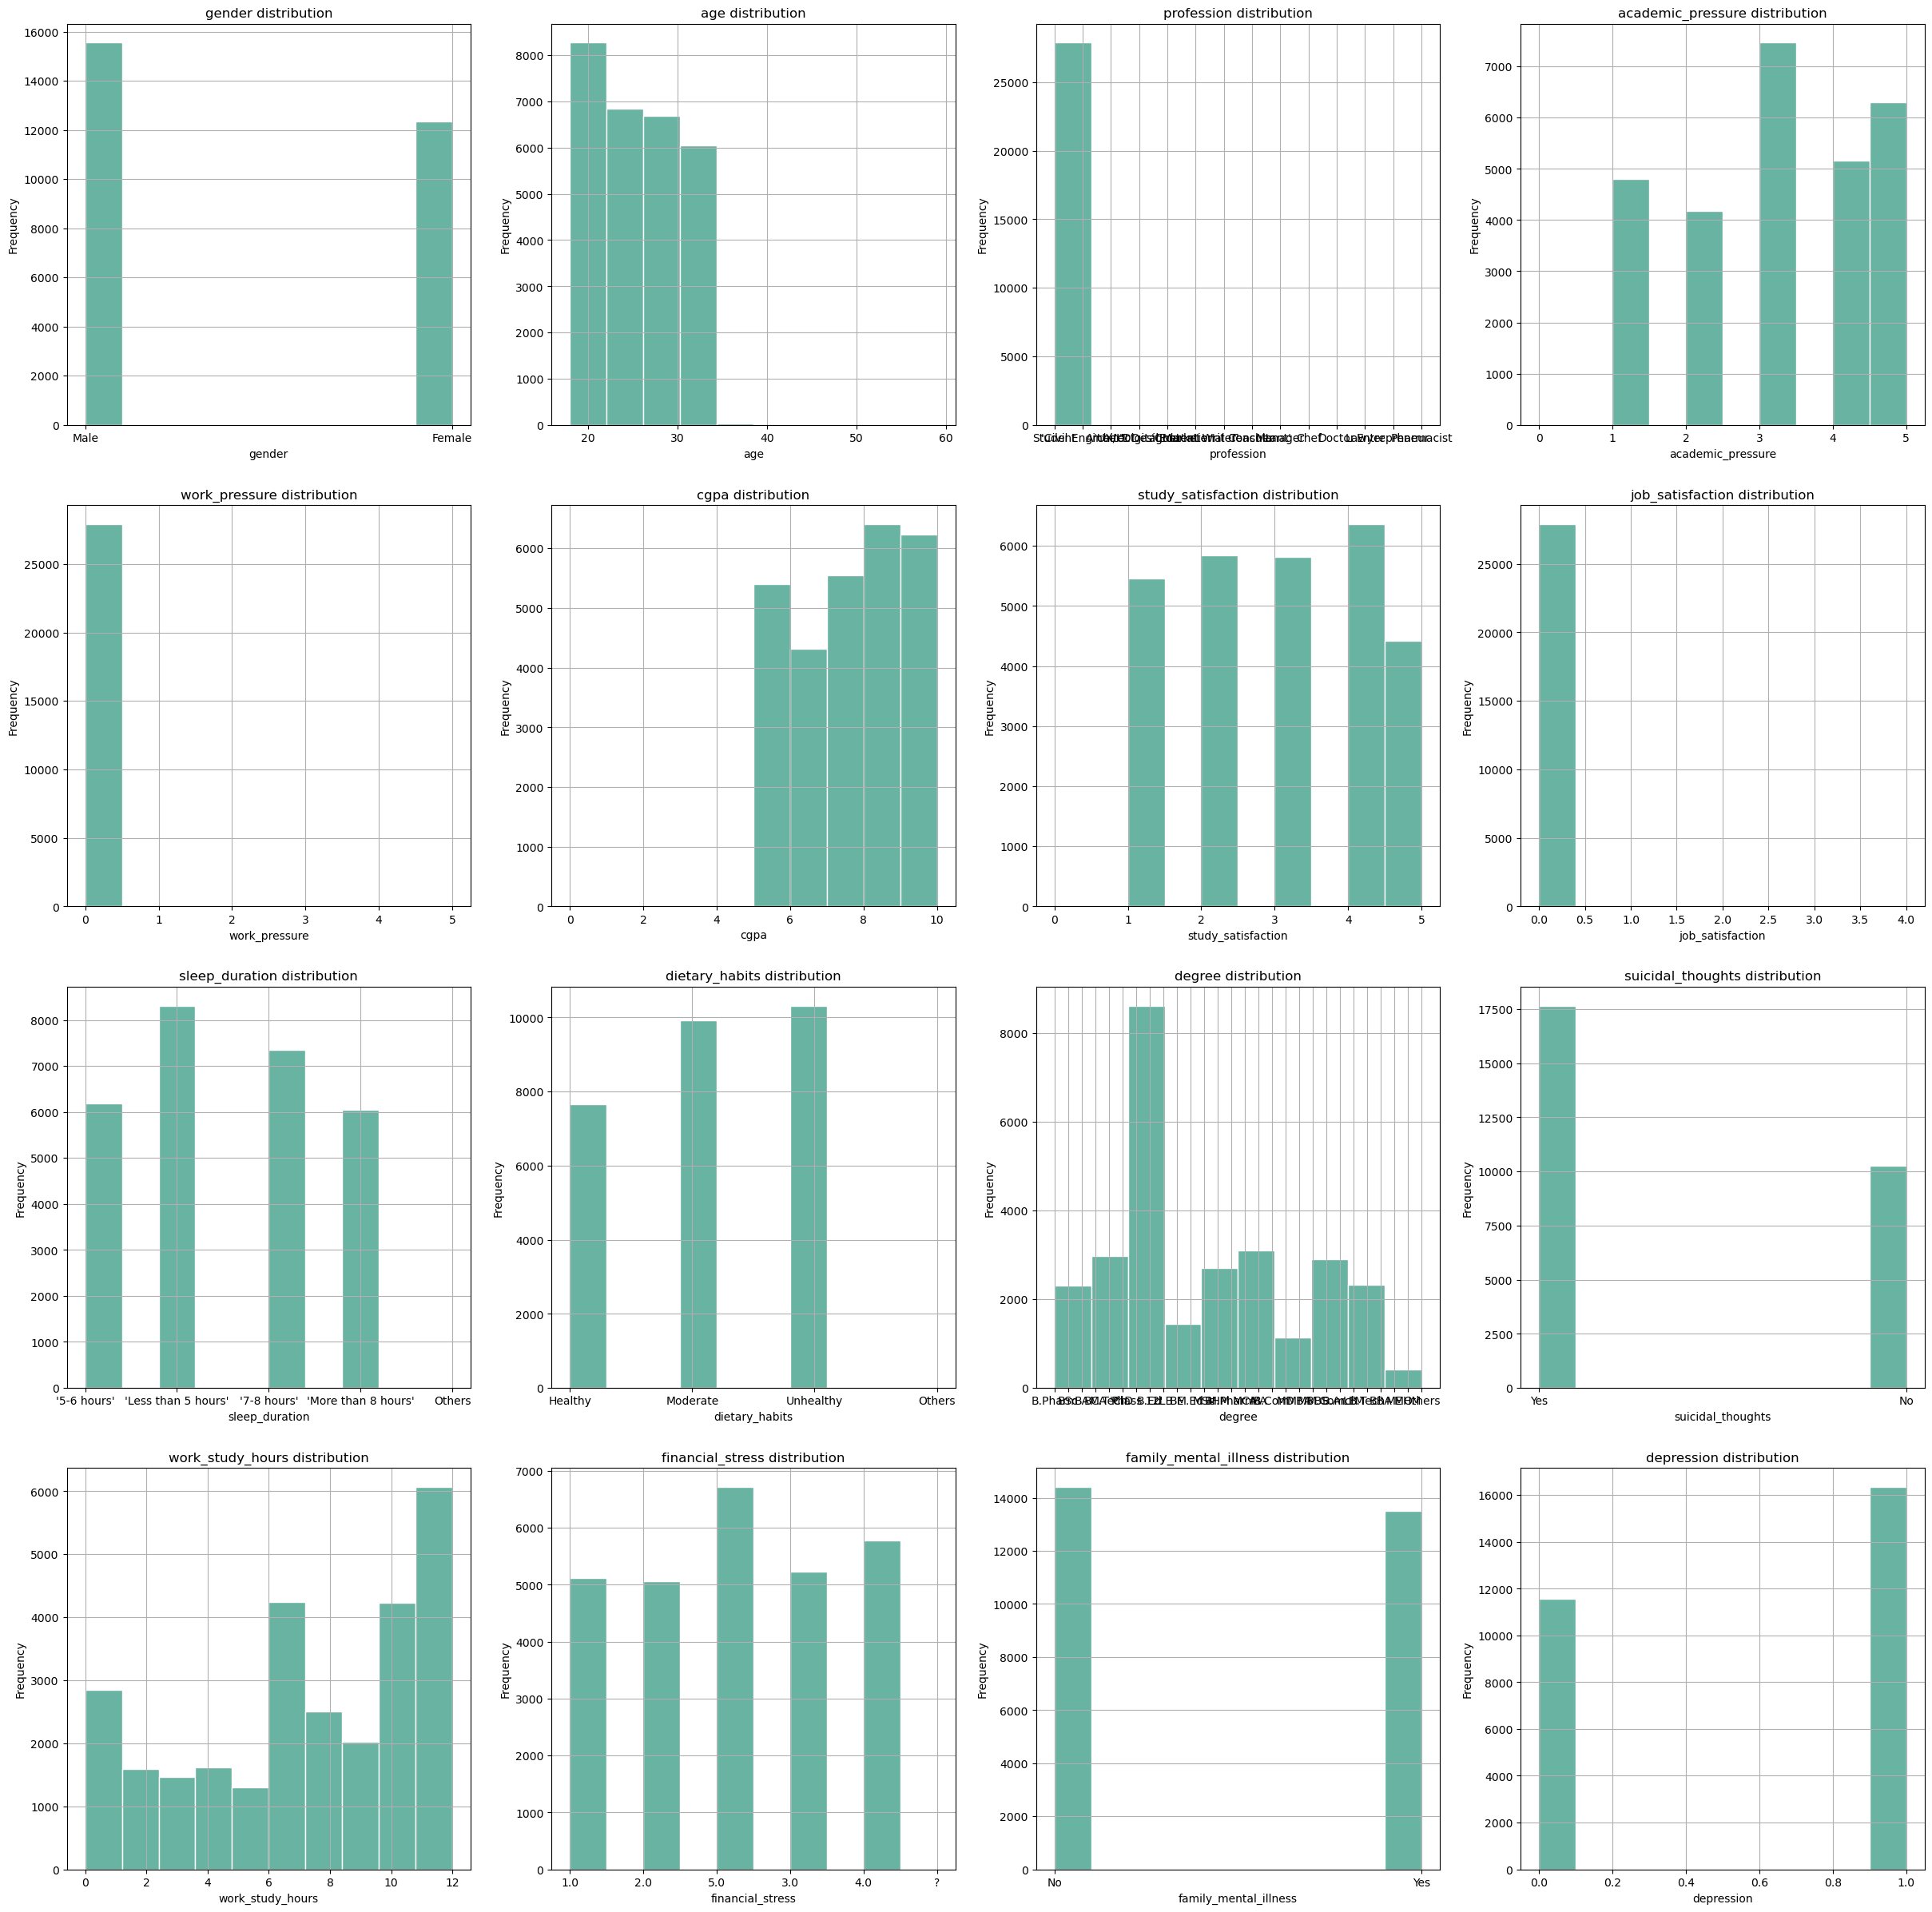

In [263]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate([col for col in df.columns if col not in ['id', 'city']]):
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
# plt.tight_layout()

# Show the plot
plt.show()

In [264]:
df["city"].value_counts()

city
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

In [265]:
df["sleep_duration"].value_counts()

sleep_duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [266]:
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['sleep_duration'] = df['sleep_duration'].apply(extract_hours)

print(df[['sleep_duration']].head())

   sleep_duration
0             5.0
1             5.0
2             5.0
3             7.0
4             5.0


3.2 Check for Missing Values

In [267]:
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()
df = df[df["dietary_habits"] != "Others"]
df = df[df["financial_stress"] != "?"]

id                        0
gender                    0
age                       0
city                      0
profession                0
academic_pressure         0
work_pressure             0
cgpa                      0
study_satisfaction        0
job_satisfaction          0
sleep_duration           18
dietary_habits            0
degree                    0
suicidal_thoughts         0
work_study_hours          0
financial_stress          0
family_mental_illness     0
depression                0
dtype: int64


3.3 Drop not useful columns

In [268]:
df = df.drop(columns=['id', 'profession', 'job_satisfaction', 'work_pressure'])

3.4 Deal with categorical features

In [269]:
df['suicidal_thoughts'] = df['suicidal_thoughts'].map({'Yes': 1, 'No': 0})
df['family_mental_illness'] = df['family_mental_illness'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [270]:
display(df["dietary_habits"].unique())
df['dietary_habits'] = df['dietary_habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [271]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['city', 'degree'])
df_encoded = encoder.fit_transform(df)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, 0 to 27900
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 27868 non-null  int64  
 1   age                    27868 non-null  float64
 2   city_0                 27868 non-null  int64  
 3   city_1                 27868 non-null  int64  
 4   city_2                 27868 non-null  int64  
 5   city_3                 27868 non-null  int64  
 6   city_4                 27868 non-null  int64  
 7   city_5                 27868 non-null  int64  
 8   academic_pressure      27868 non-null  float64
 9   cgpa                   27868 non-null  float64
 10  study_satisfaction     27868 non-null  float64
 11  sleep_duration         27868 non-null  float64
 12  dietary_habits         27868 non-null  int64  
 13  degree_0               27868 non-null  int64  
 14  degree_1               27868 non-null  int64  
 15  degree_

In [272]:
df_encoded.dtypes


gender                     int64
age                      float64
city_0                     int64
city_1                     int64
city_2                     int64
city_3                     int64
city_4                     int64
city_5                     int64
academic_pressure        float64
cgpa                     float64
study_satisfaction       float64
sleep_duration           float64
dietary_habits             int64
degree_0                   int64
degree_1                   int64
degree_2                   int64
degree_3                   int64
degree_4                   int64
suicidal_thoughts          int64
work_study_hours         float64
financial_stress          object
family_mental_illness      int64
depression                 int64
dtype: object

In [273]:
df["financial_stress"].value_counts()

financial_stress
5.0    6709
4.0    5770
3.0    5220
1.0    5113
2.0    5056
Name: count, dtype: int64

In [274]:
# First convert financial_stress from object to float
# df_encoded['financial_stress'] = df_encoded['financial_stress'].astype(float)
# Now all columns are numeric, we can check

df_encoded = df_encoded.astype(float)

# Verify the conversion
print("All columns converted to float:")
print(df_encoded.dtypes)

All columns converted to float:
gender                   float64
age                      float64
city_0                   float64
city_1                   float64
city_2                   float64
city_3                   float64
city_4                   float64
city_5                   float64
academic_pressure        float64
cgpa                     float64
study_satisfaction       float64
sleep_duration           float64
dietary_habits           float64
degree_0                 float64
degree_1                 float64
degree_2                 float64
degree_3                 float64
degree_4                 float64
suicidal_thoughts        float64
work_study_hours         float64
financial_stress         float64
family_mental_illness    float64
depression               float64
dtype: object


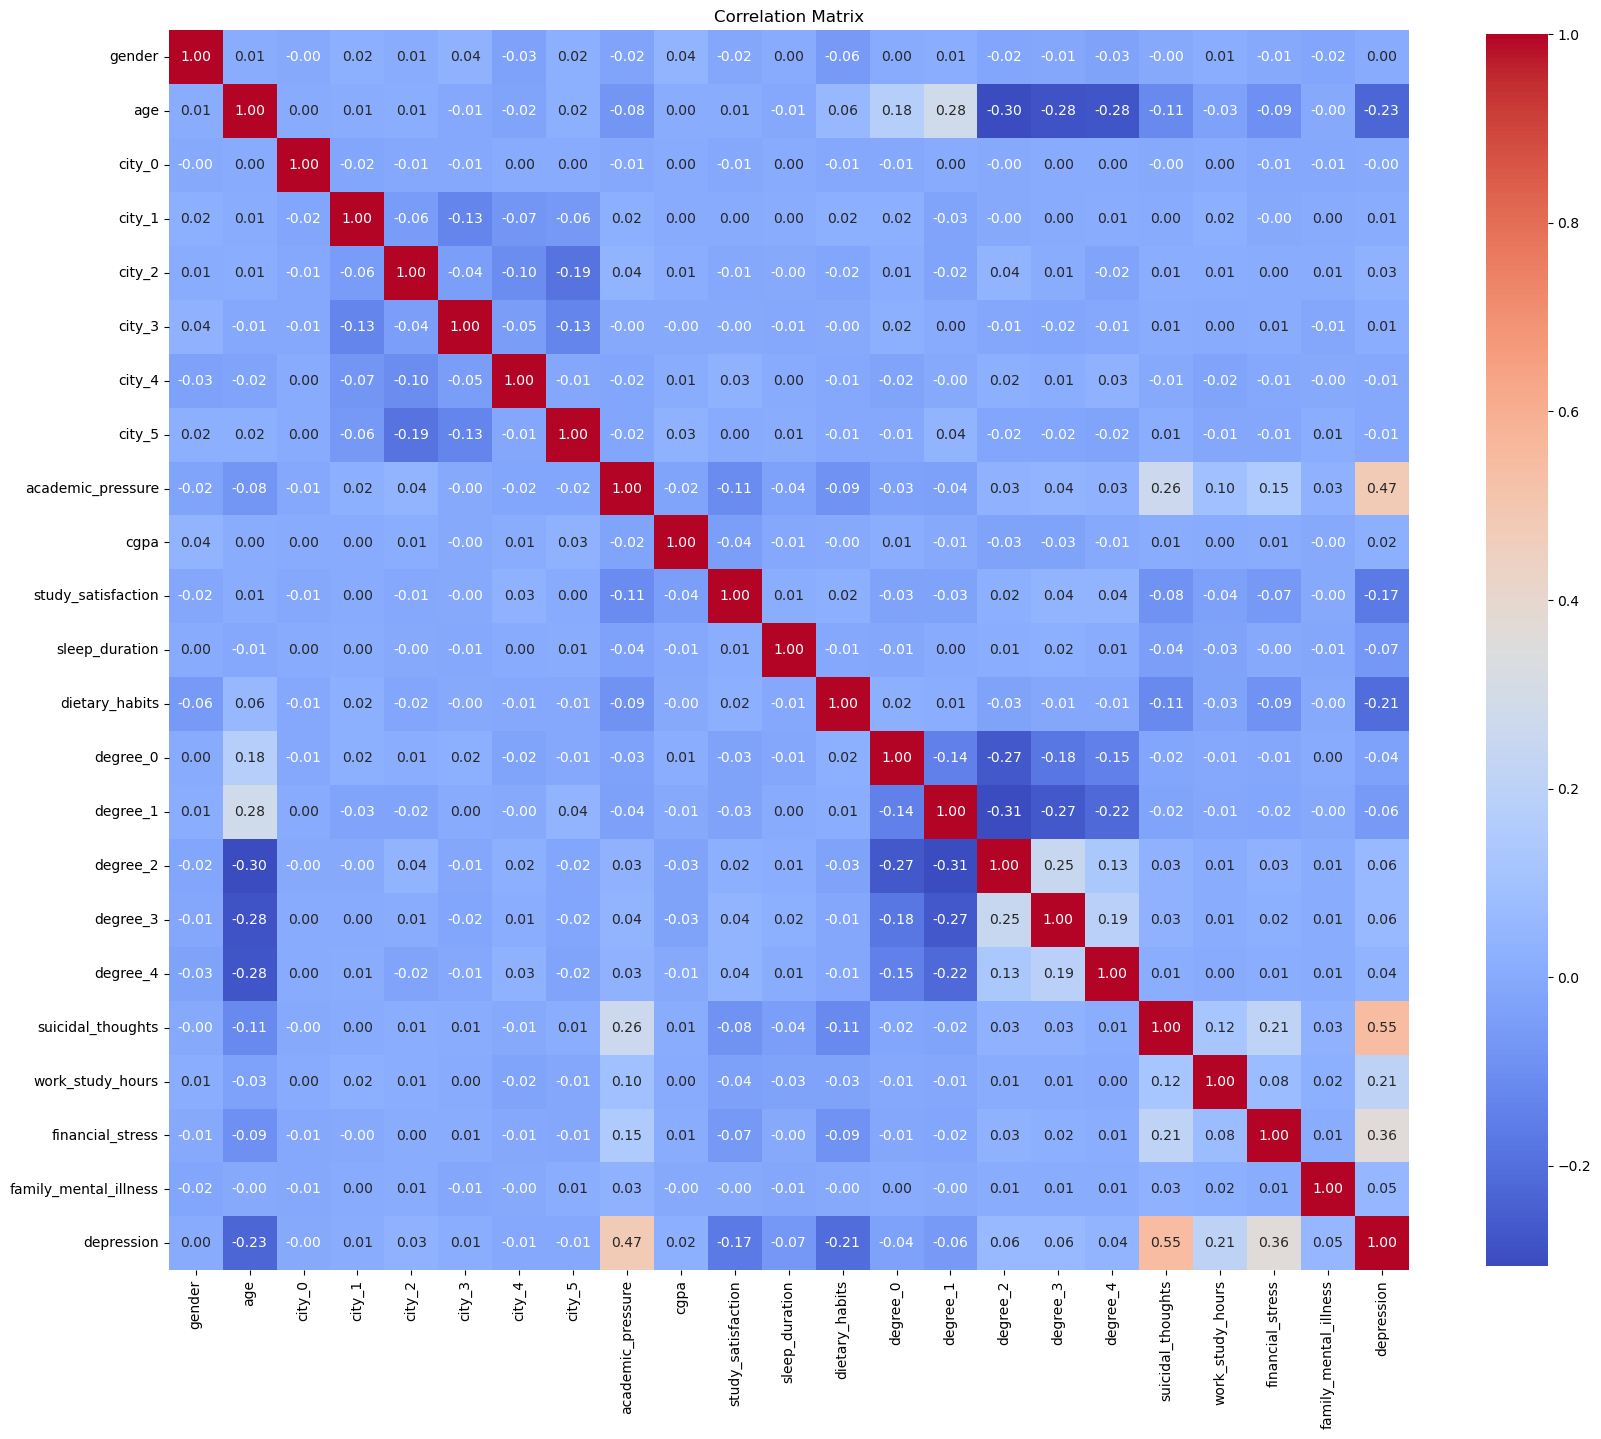

In [275]:
correlation_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [276]:
# As we may see from the correlation matrix degree and city are not correlated with depression, so we can drop them.

df_encoded = df_encoded.drop(columns=['degree_0', 'degree_1', 'degree_2', 'degree_3', 'degree_4', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_5'])


In [277]:
df_encoded.head()

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,1.0,33.0,5.0,8.97,2.0,5.0,2.0,1.0,3.0,1.0,0.0,1.0
1,0.0,24.0,2.0,5.90,5.0,5.0,1.0,0.0,3.0,2.0,1.0,0.0
2,1.0,31.0,3.0,7.03,5.0,5.0,2.0,0.0,9.0,1.0,1.0,0.0
3,0.0,28.0,3.0,5.59,2.0,7.0,1.0,1.0,4.0,5.0,1.0,1.0
4,0.0,25.0,4.0,8.13,3.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0


## Creating labels

In [278]:
labels = df_encoded['depression'].copy()
# Convert labels to tensor
y = torch.tensor(labels.values, dtype=torch.float32)

X = df_encoded.drop(columns=['depression'])
X = torch.tensor(X.values, dtype=torch.float32)


## Splitting to training and testing dataset.

In [279]:
from sklearn.model_selection import train_test_split

# Using sklearn's train_test_split with torch tensors
X_train_indices, X_test_indices = train_test_split(
    range(len(X)), test_size=0.2, random_state=50
)


# Get the corresponding tensors using the indices
X_train = X[X_train_indices]
X_test = X[X_test_indices]
y_train = y[X_train_indices]
y_test = y[X_test_indices]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: torch.Size([22294, 11]), torch.Size([22294])
Testing set: torch.Size([5574, 11]), torch.Size([5574])


## Normalizing

In [280]:
mean = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True)

# Avoid division by zero
eps = 1e-6
X_train_norm = (X_train - mean) / (std + eps)
X_test_norm  = (X_test  - mean) / (std + eps)

In [281]:
display(df_encoded)

display(X_train_norm)

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work_study_hours,financial_stress,family_mental_illness,depression
0,1.0,33.0,5.0,8.97,2.0,5.0,2.0,1.0,3.0,1.0,0.0,1.0
1,0.0,24.0,2.0,5.90,5.0,5.0,1.0,0.0,3.0,2.0,1.0,0.0
2,1.0,31.0,3.0,7.03,5.0,5.0,2.0,0.0,9.0,1.0,1.0,0.0
3,0.0,28.0,3.0,5.59,2.0,7.0,1.0,1.0,4.0,5.0,1.0,1.0
4,0.0,25.0,4.0,8.13,3.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,27.0,5.0,5.75,5.0,5.0,0.0,1.0,7.0,1.0,1.0,0.0
27897,1.0,27.0,2.0,9.40,3.0,5.0,2.0,0.0,0.0,3.0,1.0,0.0
27898,1.0,31.0,3.0,6.61,4.0,5.0,0.0,0.0,12.0,2.0,0.0,0.0
27899,0.0,18.0,5.0,6.88,2.0,5.0,2.0,1.0,10.0,5.0,0.0,1.0


tensor([[-1.1193, -1.1823,  0.6169,  ..., -1.3919,  0.5988,  1.0259],
        [ 0.8934, -1.1823,  0.6169,  ..., -1.3919, -0.0954,  1.0259],
        [-1.1193, -0.7751,  0.6169,  ..., -0.3116,  1.2930, -0.9747],
        ...,
        [-1.1193,  1.6685, -0.1082,  ..., -0.3116,  1.2930, -0.9747],
        [-1.1193, -0.3678,  1.3420,  ..., -1.9321, -0.7896, -0.9747],
        [ 0.8934, -1.3860,  1.3420,  ...,  0.2285, -0.0954, -0.9747]])

## Neural network

In [282]:
print(len(X_train_norm[1]))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        # nn.Linear(11, 64),
        # nn.LeakyReLU(),
        # # nn.Linear(128, 256),
        # # nn.LeakyReLU(),
        # # nn.Linear(256, 128),
        # # nn.LeakyReLU(),
        # # nn.Linear(128, 64),
        # # nn.LeakyReLU(),
        # nn.Linear(64, 32),
        # nn.LeakyReLU(),
        # nn.Dropout(0.5),
        # nn.Linear(32, 1),
        # nn.Sigmoid()
        nn.Linear(11, 64),
        nn.Dropout(0.3),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

11


In [283]:
# model = NeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001)

# for epoch in range(100):
#     model.train()
#     y_pred = model(X_train_norm)
#     loss = criterion(y_pred.squeeze(), y_train)
#     # loss = criterion(y_pred, y_train)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     print(f"Epoch {epoch+1}/{10}, Loss: {loss.item():.4f}")
    

In [284]:
# model.eval()
# with torch.no_grad():
#     y_val_pred = model(X_test_norm)
#     # For binary classification with sigmoid, we use threshold of 0.5
#     val_preds = (y_val_pred.squeeze() > 0.5).float()
#     val_acc = (val_preds == y_test).float().mean()
#     print(f'Validation accuracy: {val_acc:.2f}')

Epoch 10/100, Loss: 0.6434, Train Acc: 0.7448, Test Acc: 0.7709
Epoch 20/100, Loss: 0.5682, Train Acc: 0.8050, Test Acc: 0.8201
Epoch 30/100, Loss: 0.4877, Train Acc: 0.8256, Test Acc: 0.8358
Epoch 40/100, Loss: 0.4148, Train Acc: 0.8372, Test Acc: 0.8384
Epoch 50/100, Loss: 0.3754, Train Acc: 0.8400, Test Acc: 0.8421
Epoch 60/100, Loss: 0.3605, Train Acc: 0.8415, Test Acc: 0.8437
Epoch 70/100, Loss: 0.3575, Train Acc: 0.8435, Test Acc: 0.8441
Epoch 80/100, Loss: 0.3570, Train Acc: 0.8444, Test Acc: 0.8446
Epoch 90/100, Loss: 0.3552, Train Acc: 0.8461, Test Acc: 0.8437
Epoch 100/100, Loss: 0.3554, Train Acc: 0.8438, Test Acc: 0.8430


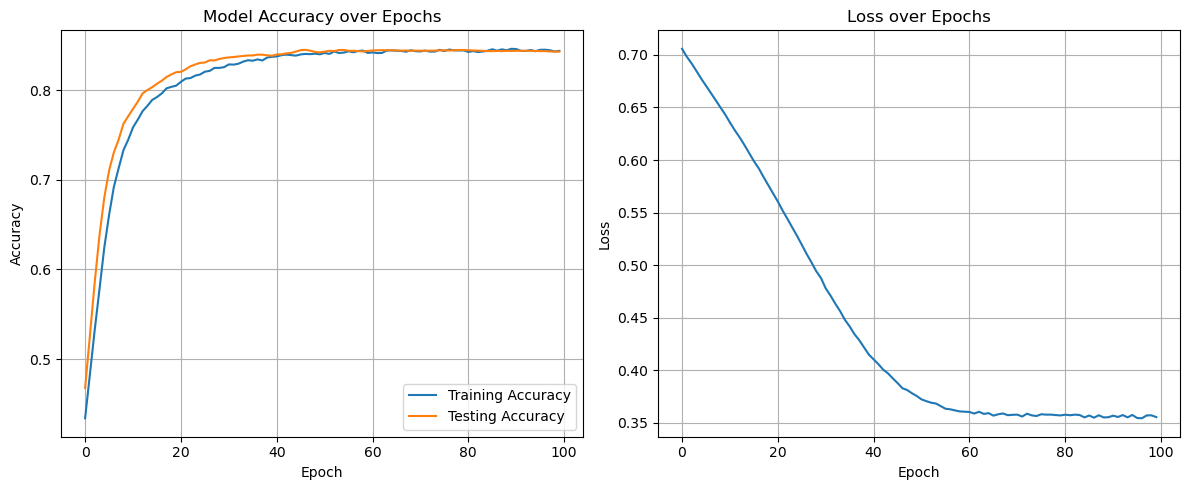

In [285]:
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Initialize lists to track metrics
train_accuracies = []
test_accuracies = []
losses = []

# Number of epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    y_pred = model(X_train_norm)
    loss = criterion(y_pred.squeeze(), y_train)
    
    # Calculate training accuracy
    train_preds = (y_pred.squeeze() > 0.5).float()
    train_acc = (train_preds == y_train).float().mean()
    train_accuracies.append(train_acc.item())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss
    losses.append(loss.item())
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test_norm)
        val_preds = (y_val_pred.squeeze() > 0.5).float()
        val_acc = (val_preds == y_test).float().mean()
        test_accuracies.append(val_acc.item())
    
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {val_acc:.4f}")

# Plot the results
plt.figure(figsize=(12, 5))

# Plot accuracies
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()


Study Corelation
Neural Network

Info o danych
Sieć (Torch)
Porównanie do xgboosta

15-20 min

# 2. XGBoost

In [286]:
from xgboost import XGBClassifier

X_train_np = X_train_norm.cpu().numpy()
y_train_np = y_train.cpu().numpy()
X_test_np  = X_test_norm.cpu().numpy()
y_test_np  = y_test.cpu().numpy()

model = XGBClassifier(
  tree_method="auto",
  gpu_id=0,
  max_depth=4,
  learning_rate=0.1,
  objective="binary:logistic",
  eval_metric="logloss",
  early_stopping_rounds=3,
)

model.fit(
  X_train_np,
  y_train_np,
  eval_set=[(X_test_np, y_test_np)]
)

# Predictions
y_pred_np     = model.predict(X_test_np)
y_pred_tensor = torch.from_numpy(y_pred_np)


[0]	validation_0-logloss:0.63597
[1]	validation_0-logloss:0.59938
[2]	validation_0-logloss:0.56923
[3]	validation_0-logloss:0.54419
[4]	validation_0-logloss:0.52278
[5]	validation_0-logloss:0.50470
[6]	validation_0-logloss:0.48913
[7]	validation_0-logloss:0.47586
[8]	validation_0-logloss:0.46443
[9]	validation_0-logloss:0.45447
[10]	validation_0-logloss:0.44602
[11]	validation_0-logloss:0.43816
[12]	validation_0-logloss:0.43139
[13]	validation_0-logloss:0.42555
[14]	validation_0-logloss:0.42014
[15]	validation_0-logloss:0.41536
[16]	validation_0-logloss:0.41143
[17]	validation_0-logloss:0.40723
[18]	validation_0-logloss:0.40362
[19]	validation_0-logloss:0.40044
[20]	validation_0-logloss:0.39742
[21]	validation_0-logloss:0.39474
[22]	validation_0-logloss:0.39252
[23]	validation_0-logloss:0.39036
[24]	validation_0-logloss:0.38840
[25]	validation_0-logloss:0.38635
[26]	validation_0-logloss:0.38452
[27]	validation_0-logloss:0.38289
[28]	validation_0-logloss:0.38160
[29]	validation_0-loglos

/Users/jakub/miniconda3/envs/depression/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:17] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [287]:
from sklearn.metrics import accuracy_score

# Convert probabilities to binary predictions if needed
y_pred_binary = (y_pred_np > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred_binary)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.63%


In [288]:
# import torch.nn as nn
# import torch.optim as optim

# # Define the neural network model
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size=64, dropout_rate=0.2):
#         super(MLP, self).__init__()
#         self.network = nn.Sequential(
#             nn.Linear(input_size, hidden_size),
#             nn.ReLU(),
#             nn.Dropout(dropout_rate),
#             nn.Linear(hidden_size, hidden_size // 2),
#             nn.ReLU(),
#             nn.Dropout(dropout_rate),
#             nn.Linear(hidden_size // 2, 1),
#             nn.Sigmoid()
#         )
        
#     def forward(self, x):
#         return self.network(x).squeeze()

# # Set input size based on our data
# input_size = X_train.shape[1]

# # Initialize model, loss function and optimizer
# model = MLP(input_size)
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training parameters
# batch_size = 64
# epochs = 100

# # Training loop
# for epoch in range(epochs):
#     model.train()
#     # Simple batch implementation
#     for i in range(0, len(X_train_norm), batch_size):
#         # Get batch
#         X_batch = X_train_norm[i:i+batch_size]
#         y_batch = y_train[i:i+batch_size]
        
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     # Evaluate on test set
#     model.eval()
#     with torch.no_grad():
#         outputs = model(X_test_norm)
#         y_pred = (outputs > 0.5).float()
#         accuracy = (y_pred == y_test).float().mean()
    
#     # Print progress every 5 epochs
#     if (epoch + 1) % 5 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

# # Final evaluation
# model.eval()
# with torch.no_grad():
#     outputs = model(X_test_norm)
#     y_pred = (outputs > 0.5).float()
#     final_accuracy = (y_pred == y_test).float().mean()
    
# print(f"Final Neural Network Accuracy: {final_accuracy.item() * 100:.2f}%")

# # Compare with XGBoost
# print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")